 # Un-supervised Learning

In [1]:
from scipy.cluster.vq import kmeans
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

kmeans =KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)


In [2]:
kmeans.cluster_centers_

array([[-2.70981136,  8.97143336],
       [-6.83235205, -6.83045748],
       [ 5.6389548 ,  1.42800831],
       [-8.87357218,  7.17458342],
       [ 4.20028307,  2.38705276]])

In [3]:
import numpy as np
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([4, 4, 0, 0], dtype=int32)

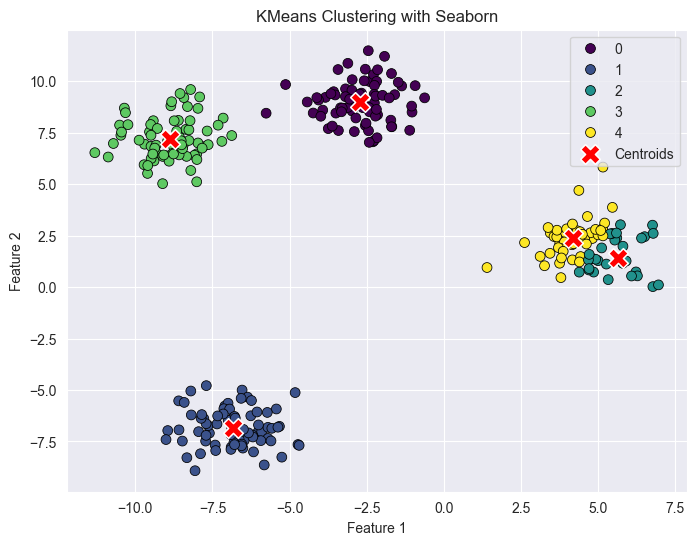

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a scatter plot with seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', s=50, edgecolor='k')

# Plot the cluster centers
centers = kmeans.cluster_centers_
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], color='red', s=200, marker='X', label='Centroids')

plt.title('KMeans Clustering with Seaborn')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [5]:
kmeans.transform(X_new).round(2)

array([[ 7.48, 11.17,  5.67, 10.27,  4.22],
       [ 9.01, 13.22,  2.7 , 12.95,  1.26],
       [ 5.98, 10.55,  8.78,  7.21,  7.23],
       [ 6.48, 10.09,  8.71,  7.51,  7.2 ]])

In [6]:
kmeans.inertia_

513.0329042790798

In [7]:
kmeans.score(X)

-513.0329042790798

In [8]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit_predict(X)

array([3, 3, 0, 1, 3, 4, 2, 4, 0, 2, 0, 2, 0, 0, 3, 0, 3, 2, 0, 0, 2, 0,
       4, 3, 0, 3, 3, 1, 4, 2, 0, 2, 3, 2, 3, 0, 3, 4, 3, 1, 2, 0, 3, 1,
       0, 0, 3, 2, 3, 2, 4, 3, 4, 0, 4, 2, 3, 2, 2, 0, 3, 2, 2, 0, 1, 1,
       1, 4, 1, 0, 4, 4, 3, 2, 0, 3, 1, 1, 0, 4, 0, 0, 3, 0, 4, 3, 3, 2,
       2, 2, 3, 0, 3, 0, 0, 3, 1, 0, 3, 3, 2, 2, 2, 0, 0, 0, 0, 0, 4, 3,
       2, 0, 0, 0, 0, 2, 3, 1, 3, 1, 1, 4, 0, 3, 4, 3, 3, 0, 3, 1, 2, 0,
       0, 0, 0, 2, 2, 3, 0, 4, 0, 2, 4, 0, 2, 2, 2, 2, 4, 0, 0, 3, 2, 1,
       0, 2, 4, 3, 3, 2, 0, 3, 4, 3, 2, 3, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1,
       4, 2, 2, 4, 3, 0, 3, 2, 2, 3, 4, 0, 2, 2, 1, 4, 1, 3, 2, 1, 4, 2,
       2, 3, 0, 0, 1, 2, 0, 1, 1, 3, 1, 0, 0, 1, 4, 2, 3, 4, 3, 3, 0, 3,
       3, 1, 3, 1, 2, 2, 3, 3, 2, 2, 2, 3, 0, 1, 2, 4, 3, 2, 3, 3, 3, 4,
       4, 2, 3, 1, 4, 4, 3, 4, 3, 1, 3, 2, 4, 3, 2, 0, 3, 0, 2, 0, 3, 0,
       4, 2, 1, 2, 2, 0, 0, 4, 2, 2, 3, 3, 1, 0, 0, 2, 2, 2, 2, 1, 3, 2,
       4, 2, 2, 4, 0, 1, 2, 0, 3, 0, 2, 0, 3, 3], d

In [9]:
from sklearn.metrics import silhouette_score
silhouette_score(X, labels)

np.float64(0.6641874438840668)

# Using Clustering for Semi-Supervised Learning

In [10]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [11]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [12]:
log_reg.score(X_test, y_test)

0.7581863979848866

In [13]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]
X_representative_digits

array([[ 0.,  0.,  0., ..., 15., 12.,  0.],
       [ 0.,  0.,  2., ...,  5.,  0.,  0.],
       [ 0.,  0.,  1., ...,  3.,  0.,  0.],
       ...,
       [ 0.,  5., 16., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 14.,  6.,  0.],
       [ 0.,  0.,  3., ...,  0.,  0.,  0.]], shape=(50, 64))

In [14]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [16]:
dbscan.labels_

array([ 0, -1,  1,  2,  3,  0,  9,  2,  1,  2,  3,  4,  2,  3,  3,  4,  2,
        5,  1,  1,  2,  8,  0,  3,  6,  4,  0,  2,  2,  5,  0,  0,  2,  2,
        7,  8,  2,  5,  5,  8,  8,  0,  2, -1,  2,  5,  3,  8,  0,  8, -1,
        0,  3,  5,  2,  0,  6, -1,  6,  3,  3,  0,  2,  1,  8,  3,  3,  3,
        2,  4,  2,  8,  2,  8,  2,  4,  1,  2,  4,  5,  4,  5,  4,  2,  0,
       -1,  2,  2,  4,  3,  0,  1,  5,  0,  6,  7,  3,  4,  2,  9, -1,  0,
        2,  0,  2,  4,  3, -1,  8,  8,  5,  1,  8,  2,  8,  2,  8,  3,  0,
        5,  4,  3,  3,  0,  3,  9,  4,  8,  0,  2,  2,  2,  2,  5,  2,  4,
       10,  2,  3,  5,  2,  0, -1,  5,  5,  3,  5,  3,  3,  5,  2,  4,  6,
        2,  3,  0, -1,  8,  2,  8,  6,  1,  2,  2,  5,  3,  2,  0,  4,  2,
       -1, -1,  9,  3,  2,  9,  5,  8,  4,  5,  3,  3,  3,  3,  5,  8,  2,
        4,  3,  2,  0,  2, 10, 10,  4,  2,  3,  8,  8,  0,  7,  2,  2,  3,
        3,  8,  4,  0,  3,  4,  5,  4,  5,  3,  2,  8,  3,  2,  2,  8,  5,
        3,  3,  3,  5,  1

In [17]:
dbscan.core_sample_indices_

array([  0,   2,   3,   4,   5,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  23,  24,  25,  26,  27,  28,  29,  30,  31,
        32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  44,  45,
        46,  47,  48,  49,  51,  52,  53,  54,  55,  56,  58,  59,  60,
        62,  63,  64,  65,  66,  67,  68,  69,  72,  73,  75,  76,  77,
        78,  79,  81,  82,  84,  86,  87,  88,  89,  91,  92,  93,  94,
        95,  96,  98,  99, 101, 102, 104, 105, 106, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 141, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154,
       155, 157, 158, 160, 161, 162, 163, 164, 165, 167, 168, 169, 173,
       175, 176, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188,
       189, 190, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 21

In [18]:
dbscan.components_

array([[ 0.00676521,  0.08964914],
       [ 0.48883774, -0.31941038],
       [ 1.63469007, -0.2300772 ],
       ...,
       [ 1.9538151 ,  0.41795799],
       [ 0.34155651,  0.896262  ],
       [ 0.59393708,  0.79879257]], shape=(807, 2))

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [20]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)
gm.weights_

array([0.20514266, 0.20165446, 0.59320289])

In [21]:
gm.means_

array([[-0.74138127,  0.56140602],
       [ 1.75049962, -0.05370319],
       [ 0.50532351,  0.24676422]])

In [22]:
gm.covariances_

array([[[ 0.05307765,  0.06043146],
        [ 0.06043146,  0.08485585]],

       [[ 0.04998858,  0.0581502 ],
        [ 0.0581502 ,  0.08182367]],

       [[ 0.17392928, -0.10491889],
        [-0.10491889,  0.29394228]]])

In [23]:
gm.converged_

True

In [24]:
gm.n_iter_

17

In [25]:
gm.score_samples(X).round(2)

array([-1.92, -2.21, -1.47,  0.  , -0.22, -1.53, -1.25, -3.14, -1.57,
       -1.11, -0.11, -1.74, -0.68, -0.4 , -0.6 , -1.76, -0.34, -1.64,
       -1.74, -1.7 , -1.71, -2.16, -2.03, -0.45, -0.18, -1.65, -1.53,
       -0.01, -0.03, -1.54, -1.53, -1.46, -1.04, -0.35, -1.45, -1.52,
       -0.71, -1.73, -1.49, -1.78, -2.16, -1.83, -0.07, -2.16, -0.27,
       -1.5 , -1.81, -1.58, -1.9 , -1.72, -2.22, -1.41, -0.93, -1.72,
       -0.58, -1.51, -0.15, -1.25, -0.33, -1.13, -0.98, -1.46, -0.17,
       -1.67, -1.67, -0.54, -1.76, -0.53,  0.05, -1.44, -3.35, -1.61,
       -0.53, -1.68, -2.09, -1.85, -1.35, -1.46, -1.82, -1.4 , -1.97,
       -1.58, -1.78, -1.33, -1.72, -1.14, -1.07, -0.53, -1.56, -0.3 ,
       -1.36, -1.51, -1.67, -1.55, -0.76, -1.82, -1.14, -2.05,  0.12,
       -0.57, -1.23, -1.52, -0.68, -1.29, -0.37, -1.74, -1.67, -1.06,
       -1.85, -2.23, -1.76, -1.54, -1.73, -0.37, -1.73, -1.71, -2.09,
       -2.13, -1.38, -1.61, -1.32, -0.27, -1.99, -1.42, -1.65, -0.77,
       -1.51, -1.68,

In [26]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
print(density_threshold)
anomalies = X[densities < density_threshold]

-2.2309063258427266


In [27]:
anomalies

array([[ 1.91740487,  0.43454912],
       [ 1.95776901,  0.48449664],
       [-0.95294629,  0.01351477],
       [-0.99135646, -0.03727722],
       [-0.94020476,  0.05690261],
       [ 1.89511936,  0.45545205],
       [-0.94054061, -0.00221711],
       [ 1.21744839, -0.33081581],
       [-0.99679005,  0.01020424],
       [-0.25244531,  0.88039211],
       [-0.93369197,  0.0868383 ],
       [ 1.14805368, -0.59373645],
       [-0.93689287,  0.05878438],
       [-0.99037287,  0.02774741],
       [ 1.0986101 , -0.60466478],
       [ 1.24275195, -0.3914719 ],
       [-0.98854969, -0.11350162],
       [ 1.9593092 ,  0.44680554],
       [ 1.23119976, -0.44650225],
       [ 1.22827906, -0.43514709]])

In [28]:
X.shape

(1000, 2)

In [29]:
gm.bic(X)

np.float64(2758.2271232894195)

In [30]:
gm.aic(X)

np.float64(2674.795283546723)

In [31]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

D:\data science\Hands_On_Machine_Learning\Chapter3\.venv\Lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


array([0.16, 0.12, 0.12, 0.12, 0.15, 0.13, 0.09, 0.  , 0.1 , 0.  ])